In [1]:
# Importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

In [3]:
# Importing cleaned and optimized data 
pop = pd.read_csv('population.csv')
pop.head()

Rank CCA3         Country           Capital Continent  2022 Population  \
0    36  AFG     Afghanistan             Kabul      Asia         41128771   
1   138  ALB         Albania            Tirana    Europe          2842321   
2    34  DZA         Algeria           Algiers    Africa         44903225   
3   213  ASM  American Samoa         Pago Pago   Oceania            44273   
4   203  AND         Andorra  Andorra la Vella    Europe            79824   

   2020 Population  2015 Population  2010 Population  2000 Population  \
0         38972230         33753499         28189672         19542982   
1          2866849          2882481          2913399          3182021   
2         43451666         39543154         35856344         30774621   
3            46189            51368            54849            58230   
4            77700            71746            71519            66097   

   1990 Population  1980 Population  1970 Population  Area (km²)  \
0         10694796         12486631         10752971      652230   
1          3295066          2941651          2324731       28748   
2         25518074         18739378         13795915     2381741   
3            47818            32886            27075         199   
4            53569            35611            19860         468   

   Density (per km²)  Growth Rate  World Population Percentage  \
0            63.0587       1.0257                         0.52   
1            98.8702       0.9957                         0.04   
2            18.8531       1.0164                         0.56   
3           222.4774       0.9831                         0.00   
4           170.5641       1.0100                         0.00   

   SexRatioAllAges    HdiTier  HI_Avg_4decades  fertility_rate  \
0            102.1        Low            0.390            4.53   
1             99.8       High            0.719            1.55   
2            103.8       High            0.674            2.97   
3             98.0  Very High            0.980            2.13   
4            104.4  Very High            0.866            1.46   

   gdpgrowth_10yr_avg  deathrate_10yr_avg  birthrate_10yr_avg  
0                3.06                7.28               38.21  
1                1.89                8.22               11.37  
2                1.80                4.64               24.60  
3               -0.40                4.97               15.60  
4               -0.81                4.12                8.12

In [4]:
# Dropping the columns not required for analysis
pop.drop(columns=['CCA3','Capital'],inplace = True)

In [5]:
# Checking missing values
pop.isnull().sum()

Rank                           0
Country                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
SexRatioAllAges                0
HdiTier                        0
HI_Avg_4decades                0
fertility_rate                 0
gdpgrowth_10yr_avg             0
deathrate_10yr_avg             0
birthrate_10yr_avg             0
dtype: int64

In [6]:
# Checking the number of duplicate entries in the data
print(f"Amount of duplicates in the data: {pop.duplicated().sum()}")

Amount of duplicates in the data: 0


In [7]:
custom_palette = ['#0b3d91', '#e0f7fa', '#228b22', '#1e90ff', '#8B4513', '#D2691E',
'#DAA520', '#556B2F']

In [8]:
# Countries by continent
countries_by_continent = pop['Continent'].value_counts().reset_index()

In [9]:
countries_by_continent

index  Continent
0         Africa         54
1           Asia         49
2         Europe         47
3  North America         34
4        Oceania         18
5  South America         12

In [10]:
# Creating the bar chart
fig = px.bar(countries_by_continent,x = 'Continent',y='index',color = 'Continent',
            text = 'index',title = 'Number of countries by continent',
             color_discrete_sequence=custom_palette)

#Customizing the bar chart
fig.update_layout(xaxis_title = 'Continent',yaxis_title = 'Number of Countries',
                plot_bgcolor = 'rgba(0,0,0,0)',font_family = 'Arial',title_font_size = 20)

fig.show()

In [11]:
# Checking ratio of countries belonging to which teir of human development 
hdi_count = pop['HdiTier'].value_counts().reset_index()

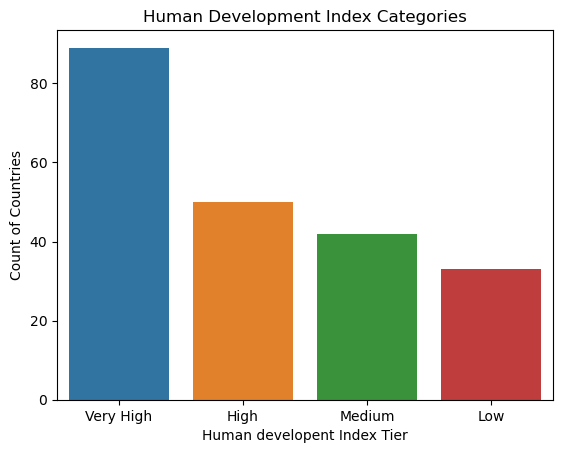

In [12]:
# Bar plot of Human Development Index
sns.barplot(data = hdi_count ,x = 'index',y = 'HdiTier')

plt.xlabel('Human developent Index Tier')
plt.ylabel('Count of Countries')
plt.title('Human Development Index Categories')

plt.show()

Most of the Countries are in the **Very high** category, indicating that they have a very high Human Development Index (HDI).

# Univariate Analysis of the numeric/discrete features

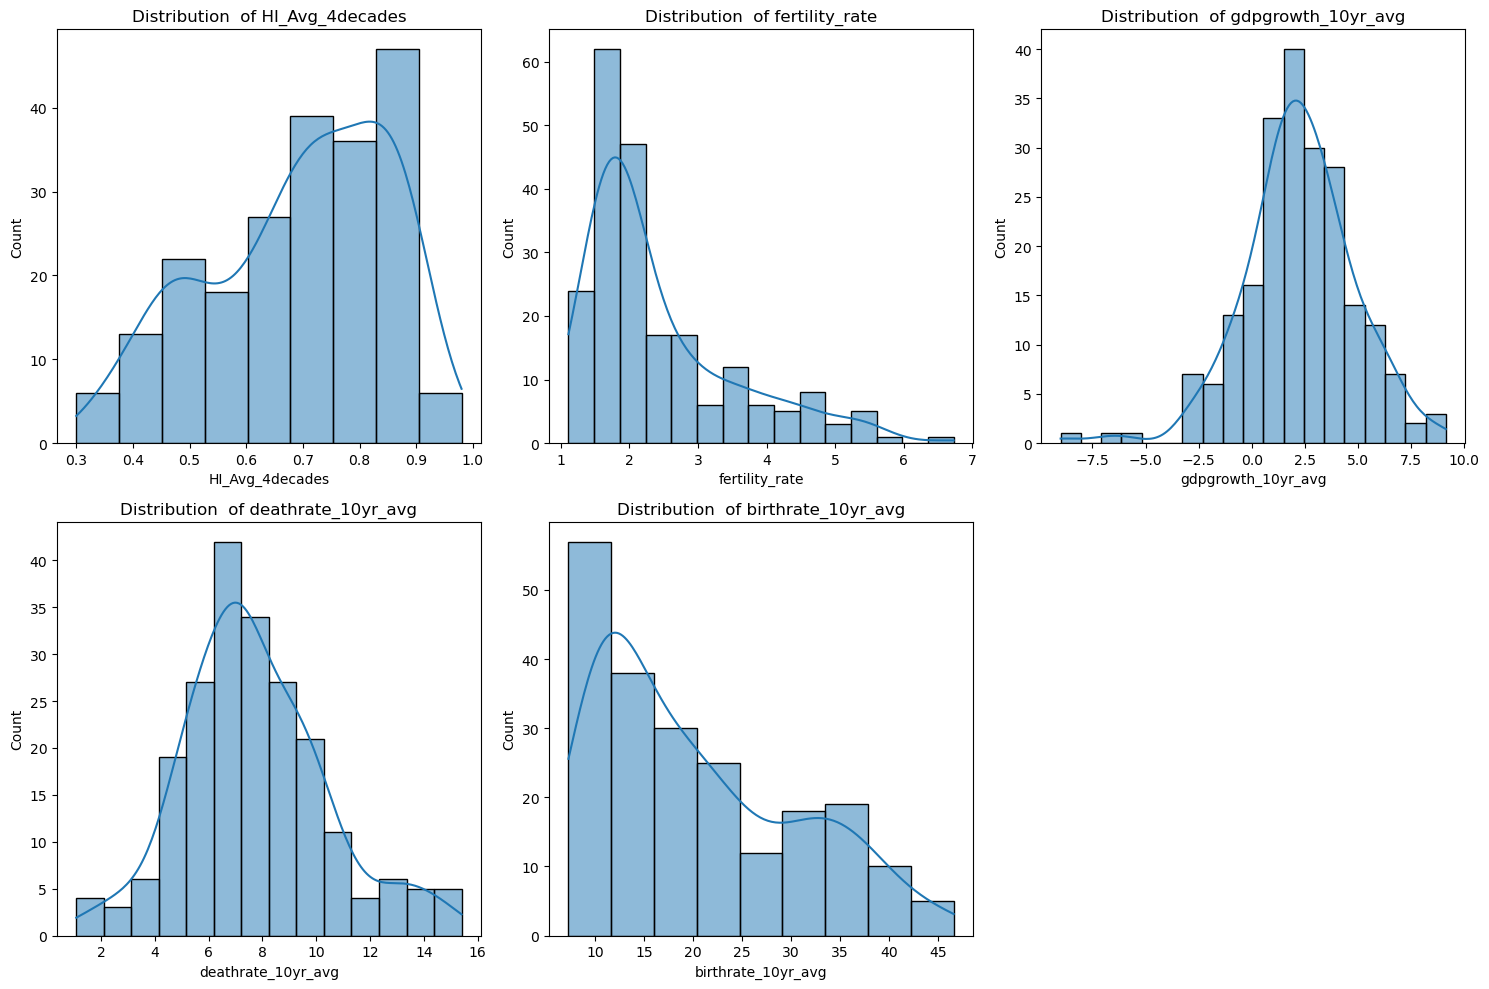

In [13]:
# List of variables to plot
univariate_plot = ['HI_Avg_4decades', 'fertility_rate', 'gdpgrowth_10yr_avg', 'deathrate_10yr_avg', 'birthrate_10yr_avg']

# Create subplots with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2x3 grid of plots, adjust figsize as needed

# Flatten axes array for easy indexing
axes = axes.flatten()

# Loop through the variables and plot each on a subplot
for ind, value in enumerate(univariate_plot):
    sns.histplot(x=pop[value] ,ax=axes[ind],kde = True)
    axes[ind].set_title(f'Distribution  of {value}')
    axes[ind].set_xlabel(value)  # Or some other meaningful label for x-axis

# Hide any unused subplots if the grid has extra spaces
for i in range(len(univariate_plot), len(axes)):
    fig.delaxes(axes[i])

# Display the plots
plt.tight_layout()
plt.show()

- The distribution of **average Human Development Index (HDI)** for 4 decades is **left-skewed**, indicating that most countries have a high HDI score, which means that most countries in the world have a **high standard of living**.

- **Fertility rate** and **birth rate** are **right-skewed** and follow the same pattern, showing a **high correlation** between them. This also indicates that the **average woman gives birth to 2 to 3 children** in her life cycle, and the birth rate is around **10 births per 1000 population**.

- **GDP** and **death rate** show a **normal distribution**, meaning that the average GDP and death rate are concentrated near the mean. GDP growth is mainly around **2.5% to 5.0%**, and the death rate is near **6 to 10 people out of 1000 population**.

In [14]:
pop.head()

Rank         Country Continent  2022 Population  2020 Population  \
0    36     Afghanistan      Asia         41128771         38972230   
1   138         Albania    Europe          2842321          2866849   
2    34         Algeria    Africa         44903225         43451666   
3   213  American Samoa   Oceania            44273            46189   
4   203         Andorra    Europe            79824            77700   

   2015 Population  2010 Population  2000 Population  1990 Population  \
0         33753499         28189672         19542982         10694796   
1          2882481          2913399          3182021          3295066   
2         39543154         35856344         30774621         25518074   
3            51368            54849            58230            47818   
4            71746            71519            66097            53569   

   1980 Population  1970 Population  Area (km²)  Density (per km²)  \
0         12486631         10752971      652230            63.0587   
1          2941651          2324731       28748            98.8702   
2         18739378         13795915     2381741            18.8531   
3            32886            27075         199           222.4774   
4            35611            19860         468           170.5641   

   Growth Rate  World Population Percentage  SexRatioAllAges    HdiTier  \
0       1.0257                         0.52            102.1        Low   
1       0.9957                         0.04             99.8       High   
2       1.0164                         0.56            103.8       High   
3       0.9831                         0.00             98.0  Very High   
4       1.0100                         0.00            104.4  Very High   

   HI_Avg_4decades  fertility_rate  gdpgrowth_10yr_avg  deathrate_10yr_avg  \
0            0.390            4.53                3.06                7.28   
1            0.719            1.55                1.89                8.22   
2            0.674            2.97                1.80                4.64   
3            0.980            2.13               -0.40                4.97   
4            0.866            1.46               -0.81                4.12   

   birthrate_10yr_avg  
0               38.21  
1               11.37  
2               24.60  
3               15.60  
4                8.12

In [15]:
# Grouping the Population percentage by Continent to get the population in each continent
continent_pop_perc = pop.groupby(by ='Continent')['World Population Percentage'].sum().reset_index()

In [16]:
# Creating pie chart 
fig = go.Figure(data = go.Pie(labels = continent_pop_perc['Continent'],
       values=continent_pop_perc['World Population Percentage']))

# Customizing pie chart
fig.update_layout(title = 'World Population Percentage by Continent',
                 template = 'plotly',
                 paper_bgcolor = 'rgba(255,255,255,0)',
                 plot_bgcolor = 'rgba(255,255,255,0)')

#Update Pie Colours
fig.update_traces(marker = dict(colors = custom_palette,line=dict(color='#FFFFFF',
                                                                  width = 1)))

fig.show()

**Asia contributes more than 50% of the world's population compared to the other continents, which means the Asian continent has a higher population concentration.**

In [17]:
# Melting the population data to long form to have better analysis on population
df_melted = pop.melt(id_vars=['Continent'],
                    value_vars = ['2022 Population','2020 Population','2015 Population',
                                 '2010 Population','2000 Population','1990 Population',
                                 '1980 Population','1970 Population'],
                    var_name='Year',value_name='Population')

df_melted['Year'] = df_melted['Year'].str.split().str[0].astype(int)

#Aggregating Population by Continent and Year
pop_by_continent = df_melted.groupby(by = ['Continent','Year']).sum().reset_index()

In [18]:
# Created line plot to see the changes in population year by year for each continent
fig = px.line(pop_by_continent,x = 'Year',y = 'Population',color = 'Continent',
             title = 'Population Trends By Continent Over Time',
             labels = {'Popualtion':'Population','Year':'Year'},
             color_discrete_sequence=custom_palette)

# Updating the layout 
fig.update_layout(template='plotly_white',
                  xaxis_title='Year',
                  yaxis_title='Population',
                  font_family='Arial',
                  title_font_size=20,
                 )
fig.update_traces(line = dict(width=3))

fig.show()

- **Asia's population** has increased **exponentially year by year**.
- **Africa's population** has also increased **steadily**.
- **Europe's population** has decreased **slightly** after the year 2000.

In [19]:
features = ['1970 Population','2020 Population']

#Checking the changes in population in 50 years
for feature in features:
    fig = px.choropleth(pop,locations = 'Country',
                       locationmode='country names',
                       color = feature,
                       hover_name= 'Country',
                       template = 'plotly_white',
                       title = feature)
    fig.show()

Over the past 50 years, **India** has experienced a remarkable population growth. In **1970**, the population of India was approximately **557 million**. By **2020**, this number had surged to around **1.4 billion**, reflecting the significant demographic changes the country has undergone in just over half a century.

In [20]:
# Grouping the countries by popualtion changes from year 1970 to 2020
growth = (pop.groupby(by='Country')['2020 Population'].sum() - 
          pop.groupby(by ='Country')['1970 Population'].sum()).sort_values(ascending = False).head(10)

In [21]:
fig = px.bar(x = growth.index,y=growth.values,text=growth.values,
             color=growth.values,title='Growth of top 10 Countries from 1970 to 2020',
            template = 'plotly_white')

fig.update_layout(xaxis_title = 'Country',yaxis_title='Population Growth')

fig.show()

In [22]:
top_10_pop_countries_1970 = pop.groupby(by='Country')['1970 Population'].sum().sort_values(ascending = False).head(10)
top_10_pop_countries_2020 = pop.groupby(by='Country')['2020 Population'].sum().sort_values(ascending = False).head(10)

In [23]:
features = {'top_10_pop_countries_1970':top_10_pop_countries_1970,
           'top_10_pop_countries_2020':top_10_pop_countries_2020}

for feature_name,feature_value in features.items():
    year = feature_name.split('_')[-1]
    fig = px.bar(x = feature_value.index,
                y = feature_value.values,
                text = feature_value.values,
                color = feature_value.values,
                title = f'Top 10 Countries Popualtion for year {year}',
                template='plotly_white')
    
    fig.update_layout(xaxis_title='Country',
                     yaxis_title='Popualtion Growth')
    
    fig.show()

- **India's population** has increased **rapidly** over the past 50 years.
- **China** has shown a **steady growth** in population.
- **Russia** has experienced a **decline** in its population from **1970 to 2020**.

In [24]:
# Sorting countries by fastest growing rate 
sorted_by_growth = pop.sort_values(by='Growth Rate',ascending = False)

In [25]:
top_5_fastest_growing = sorted_by_growth.head(5)
top_5_slowest_growing = sorted_by_growth.tail(5)

In [26]:
def plot_population_trends(countries):
    #Calculating number of rows needed 
    n_cols = 2
    n_rows = (len(countries)+n_cols-1)//n_cols
    
    # Creating subplots
    fig = sp.make_subplots(rows=n_rows,cols=n_cols,horizontal_spacing=0.1,vertical_spacing=0.1,
                          subplot_titles=countries)
    
    for i ,country in enumerate(countries,start=1):
        
        country_df = pop[pop['Country']==country]
        
        country_melted = country_df.melt(id_vars = ['Country'],
                                        value_vars = ['2022 Population','2020 Population', 
                                                       '2015 Population','2010 Population', 
                                                       '2000 Population','1990 Population',
                                                       '1980 Population','1970 Population'],
                                        var_name = 'Year',
                                        value_name = 'Population'              
                                        )
        country_melted['Year'] = country_melted['Year'].str.split().str[0].astype(int)
        
        # Create line plot for each country
        line_fig = px.line(country_melted,x = 'Year',y = 'Population',color = 'Country',
                          labels = {'Population':'Population','Year':'Year'},
                          color_discrete_sequence=custom_palette)
        
        # Update the line plot to fit  the subplots
        row = (i-1)//n_cols+1
        col = (i-1)%n_cols+1
        for trace in line_fig.data:
            fig.add_trace(trace,row=row,col=col)
            
    # Update the layout of the subplots
    fig.update_layout(title = 'Population trends of selected Countries',
                     template = 'plotly_white',
                     font_family = 'arial',
                     title_font_size = 20,
                     showlegend = False,
                     height = 600*n_rows)
    
    fig.update_traces(line=dict(width=3))
    fig.update_xaxes(title_text='Year')
    fig.update_yaxes(title_text='Population')
    
    fig.show()

In [27]:
fastest = list(top_5_fastest_growing['Country'].values)

In [28]:
fastest

['Moldova', 'Poland', 'Niger', 'Syria', 'Slovakia']

In [29]:
plot_population_trends(fastest)

- Despite Moldova is the fastest growing country but it has seen declining trend in the years after 2020 it has gradually started to increase
- From the top 5 Countries only niger population growth has exponentially increased

In [30]:
# Top 5 slowest growing countries 
slowest = list(top_5_slowest_growing['Country'].values)
slowest

['Lithuania', 'Bulgaria', 'American Samoa', 'Lebanon', 'Ukraine']

In [31]:
plot_population_trends(slowest)

In [32]:
#Countries sorted by high fertility rate
high_fert_country = pop.groupby(by = 'Country')['fertility_rate'].sum().reset_index().sort_values(by = 'fertility_rate',ascending = False)

#Countries sorted by high birth rate
high_birth_country = pop.groupby(by = 'Country')['birthrate_10yr_avg'].sum().reset_index().sort_values(by = 'birthrate_10yr_avg',ascending = False)

#Countries sorted by high death rate
high_death_country = pop.groupby(by = 'Country')['deathrate_10yr_avg'].sum().reset_index().sort_values(by = 'deathrate_10yr_avg',ascending = False)

#Countries sorted by gdp growth
high_gdp_country = pop.groupby(by = 'Country')['gdpgrowth_10yr_avg'].sum().reset_index().sort_values(by = 'gdpgrowth_10yr_avg',ascending = False)

#Countries sorted by human development index
high_hi_country = pop.groupby(by = 'Country')['HI_Avg_4decades'].sum().reset_index().sort_values(by = 'HI_Avg_4decades',ascending = False)

In [33]:
high_birth = list(high_birth_country['Country'].head(5).values)
low_birth  = list(high_birth_country['Country'].tail(5).values)

In [34]:
plot_population_trends(high_birth)

- From the plot it is evident that countries with **High Birth Rate** have their population growing rapidly

In [35]:
plot_population_trends(low_birth)

- Countries with **Low Birth Rate** have negative impact on the population growth

In [36]:
high_fert = list(high_fert_country['Country'].head(5).values)
low_fert  = list(high_fert_country['Country'].tail(5).values)

In [37]:
plot_population_trends(high_fert)

- From the above plots **Niger** has **High Growing Rate, High Birth Rate, High Fertility Rate** which says if these factors are postive the countries population will keep increasing 

In [38]:
plot_population_trends(low_fert)

- The countries with **Low Fertility Rate** have a decreasing trend in their population 

In [39]:
# Grouping countries with high and low death rates
high_death = list(high_death_country['Country'].head(5).values)
low_death = list(high_death_country['Country'].tail(5).values)

In [40]:
plot_population_trends(high_death)

In [41]:
plot_population_trends(low_death)

- Countries with **High Death Rate** have seen decline in their population
- Countries with **Low Death Rate** have seen increase in their population

In [42]:
# High and low gdp  growth rate by country
high_gdp = list(high_gdp_country['Country'].head(5).values)
low_gdp = list(high_gdp_country['Country'].tail(5).values)

In [43]:
plot_population_trends(high_gdp)

In [44]:
plot_population_trends(low_gdp)

- **Gdp Growth Rates** don't have a effect on population growth

In [45]:
high_hi = list(high_hi_country['Country'].head(5).values)
low_hi = list(high_hi_country['Country'].tail(5).values)

In [46]:
plot_population_trends(high_hi)

In [47]:
plot_population_trends(low_hi)

- **Human Development Index** shows a mix trend in the population growth
- Countries with **Low Human Development Index** shows a positive growth

## Comparision of Land By country

In [48]:
# Grouping Countries by lands
land_by_country = pop.groupby(by = 'Country')['Area (km²)'].sum().sort_values(ascending = False)

# Taking the top 5 with most land area
most_land = land_by_country.head(5)
# Taking the top 5 with least land area
least_land = land_by_country.tail(5)

In [49]:
# Making subplots 
fig_subplot = sp.make_subplots(rows=1,cols=2,horizontal_spacing=0.1,
                              subplot_titles=('Countries with most land','Countries with least land'))
# Plotting countries with most lands
fig_subplot.add_trace(go.Bar(x = most_land.index,y=most_land.values,name = 'Most Land',
                            marker_color = custom_palette[2]),row=1,col=1)

# Plotting countries with least lands
fig_subplot.add_trace(go.Bar(x = least_land.index,y=least_land.values,name = 'Least Land',
                            marker_color=custom_palette[0]),row=1,col=2)

fig_subplot.update_layout(
title_text="Geographical Distribution of Land Area by Country",
showlegend=False,
template='plotly_white'
)

fig_subplot.update_yaxes(title_text="Area (km²)", row=1, col=1)
fig_subplot.update_yaxes(title_text="Area (km²)", row=1, col=2)

fig_subplot.show()

- **Russia** owns more land per square km 
- **Monaco** seems to be the world's smallest country by area
- **Russia** has almost **50%** more land the rest of the 4 countries in the top5 list

In [50]:
# Getting how much land is available per person in the country based on 2022 population
pop['Area per Person'] = pop['Area (km²)']/pop['2022 Population']

country_area_per_person = pop.groupby(by='Country')['Area per Person'].sum().sort_values(ascending = False)

most_land_available = country_area_per_person.head()

least_land_available = country_area_per_person.tail()

In [51]:
# Create subplots
fig = sp.make_subplots(rows=1,cols=2,subplot_titles=('Countries with most land available per person',
                                                    'Countries with least land available per person'),
                      horizontal_spacing=0.3)

# Plot countries with most land
fig.add_trace(go.Bar(x = most_land_available.index,y=most_land_available.values,
                      name='Most land per person',marker_color = custom_palette[3]),row=1,col=1)

# Plot countries with least land 
fig.add_trace(go.Bar(x = least_land_available.index,y=least_land_available.values,
                      name='Least land per person',marker_color = custom_palette[4]),row=1,col=2)


fig.update_layout(
title_text="Geographical Distribution of Land Area by per Person in a Country",
showlegend=False,
template='plotly_white'
)

fig.update_yaxes(title_text="Land Available Per Person", row=1, col=1)
fig.update_yaxes(title_text="Area Available Per Person", row=1, col=2)

fig.show()

- **Greenland** has less Population compared to the land it has in its country
- **Gibraltar, Hong Kong** are densely population based on the land occupancy per person in the country

# Model Building 

In [52]:
pop_corr = pop.corr(numeric_only=True)

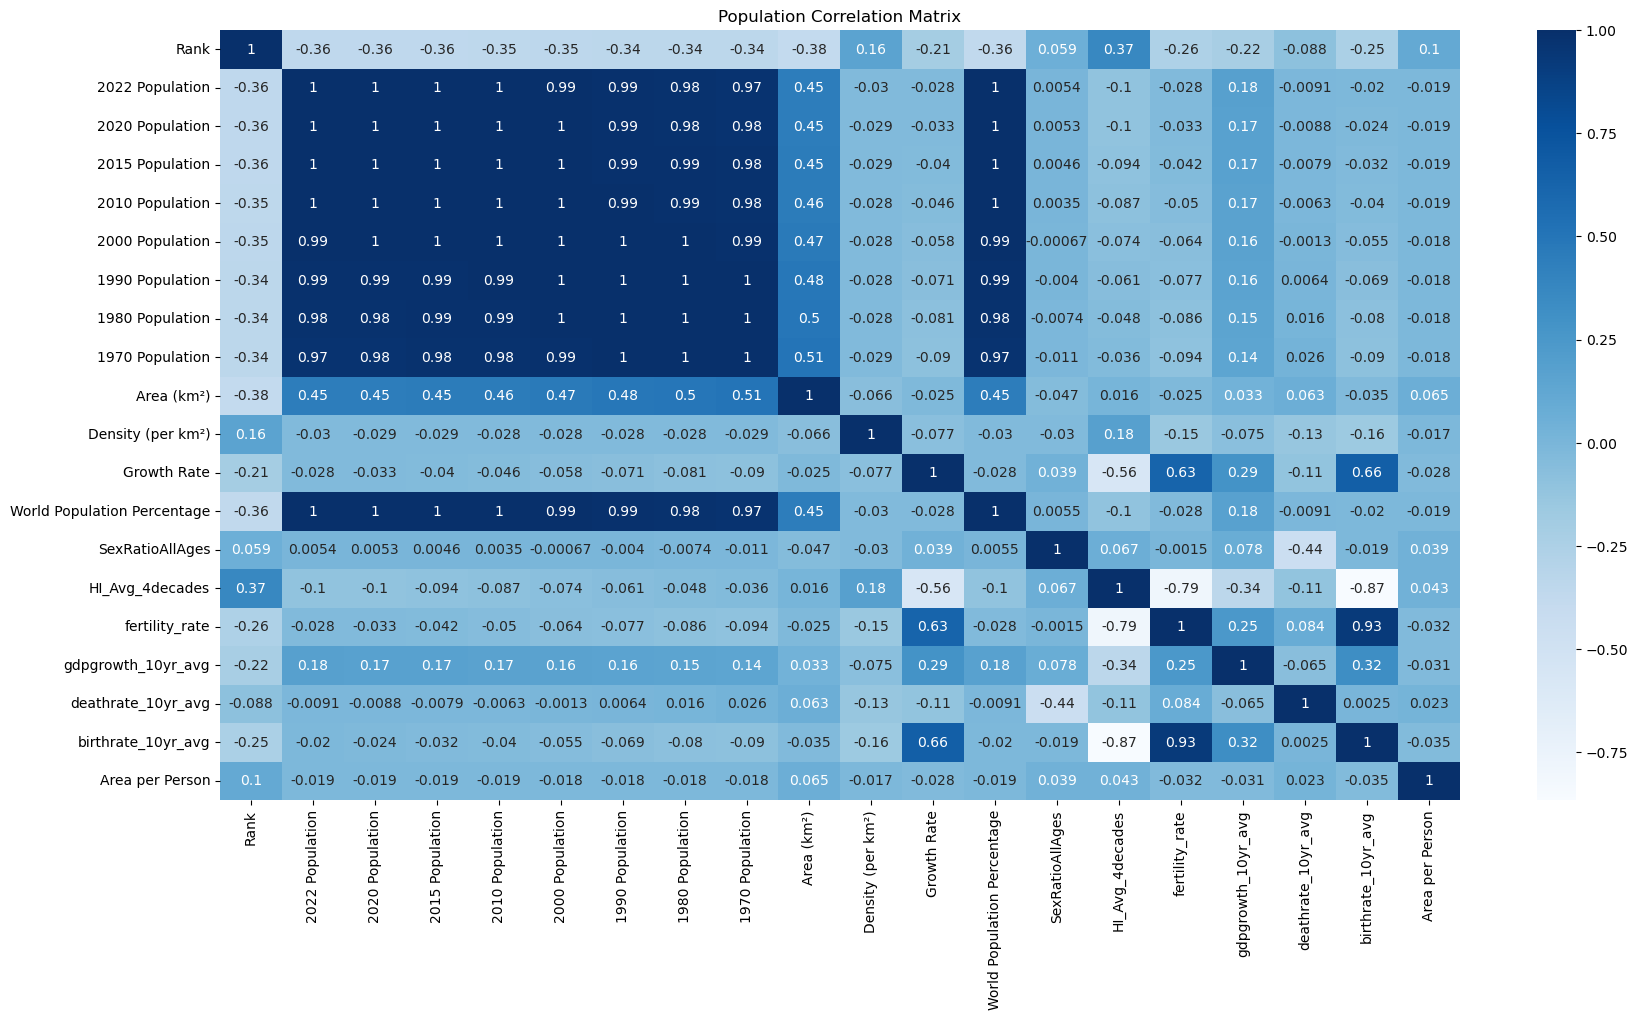

In [53]:
# Plotting the heatmap
plt.figure(figsize =(20,10))

sns.heatmap(pop_corr,annot=True,cmap = 'Blues')

plt.title('Population Correlation Matrix')

plt.show()

In [54]:
pop.head()

Rank         Country Continent  2022 Population  2020 Population  \
0    36     Afghanistan      Asia         41128771         38972230   
1   138         Albania    Europe          2842321          2866849   
2    34         Algeria    Africa         44903225         43451666   
3   213  American Samoa   Oceania            44273            46189   
4   203         Andorra    Europe            79824            77700   

   2015 Population  2010 Population  2000 Population  1990 Population  \
0         33753499         28189672         19542982         10694796   
1          2882481          2913399          3182021          3295066   
2         39543154         35856344         30774621         25518074   
3            51368            54849            58230            47818   
4            71746            71519            66097            53569   

   1980 Population  1970 Population  Area (km²)  Density (per km²)  \
0         12486631         10752971      652230            63.0587   
1          2941651          2324731       28748            98.8702   
2         18739378         13795915     2381741            18.8531   
3            32886            27075         199           222.4774   
4            35611            19860         468           170.5641   

   Growth Rate  World Population Percentage  SexRatioAllAges    HdiTier  \
0       1.0257                         0.52            102.1        Low   
1       0.9957                         0.04             99.8       High   
2       1.0164                         0.56            103.8       High   
3       0.9831                         0.00             98.0  Very High   
4       1.0100                         0.00            104.4  Very High   

   HI_Avg_4decades  fertility_rate  gdpgrowth_10yr_avg  deathrate_10yr_avg  \
0            0.390            4.53                3.06                7.28   
1            0.719            1.55                1.89                8.22   
2            0.674            2.97                1.80                4.64   
3            0.980            2.13               -0.40                4.97   
4            0.866            1.46               -0.81                4.12   

   birthrate_10yr_avg  Area per Person  
0               38.21         0.015858  
1               11.37         0.010114  
2               24.60         0.053042  
3               15.60         0.004495  
4                8.12         0.005863

In [55]:
pop.shape

(214, 23)

In [56]:
# Creating a new feature 
pop['BirthToDeathRatio'] = (pop['birthrate_10yr_avg']/pop['deathrate_10yr_avg']).round(2)

In [57]:
# Dropping The features not required for prediction
cols_drop = ['Rank','Country','Continent','2020 Population', '2015 Population','2010 Population',
            '2000 Population','1990 Population','1980 Population','1970 Population']

pop.drop(cols_drop,axis = 1 , inplace = True)

In [58]:
pop.shape

(214, 14)

In [59]:
pop.head()

2022 Population  Area (km²)  Density (per km²)  Growth Rate  \
0         41128771      652230            63.0587       1.0257   
1          2842321       28748            98.8702       0.9957   
2         44903225     2381741            18.8531       1.0164   
3            44273         199           222.4774       0.9831   
4            79824         468           170.5641       1.0100   

   World Population Percentage  SexRatioAllAges    HdiTier  HI_Avg_4decades  \
0                         0.52            102.1        Low            0.390   
1                         0.04             99.8       High            0.719   
2                         0.56            103.8       High            0.674   
3                         0.00             98.0  Very High            0.980   
4                         0.00            104.4  Very High            0.866   

   fertility_rate  gdpgrowth_10yr_avg  deathrate_10yr_avg  birthrate_10yr_avg  \
0            4.53                3.06                7.28               38.21   
1            1.55                1.89                8.22               11.37   
2            2.97                1.80                4.64               24.60   
3            2.13               -0.40                4.97               15.60   
4            1.46               -0.81                4.12                8.12   

   Area per Person  BirthToDeathRatio  
0         0.015858               5.25  
1         0.010114               1.38  
2         0.053042               5.30  
3         0.004495               3.14  
4         0.005863               1.97

In [60]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   2022 Population              214 non-null    int64  
 1   Area (km²)                   214 non-null    int64  
 2   Density (per km²)            214 non-null    float64
 3   Growth Rate                  214 non-null    float64
 4   World Population Percentage  214 non-null    float64
 5   SexRatioAllAges              214 non-null    float64
 6   HdiTier                      214 non-null    object 
 7   HI_Avg_4decades              214 non-null    float64
 8   fertility_rate               214 non-null    float64
 9   gdpgrowth_10yr_avg           214 non-null    float64
 10  deathrate_10yr_avg           214 non-null    float64
 11  birthrate_10yr_avg           214 non-null    float64
 12  Area per Person              214 non-null    float64
 13  BirthToDeathRatio   

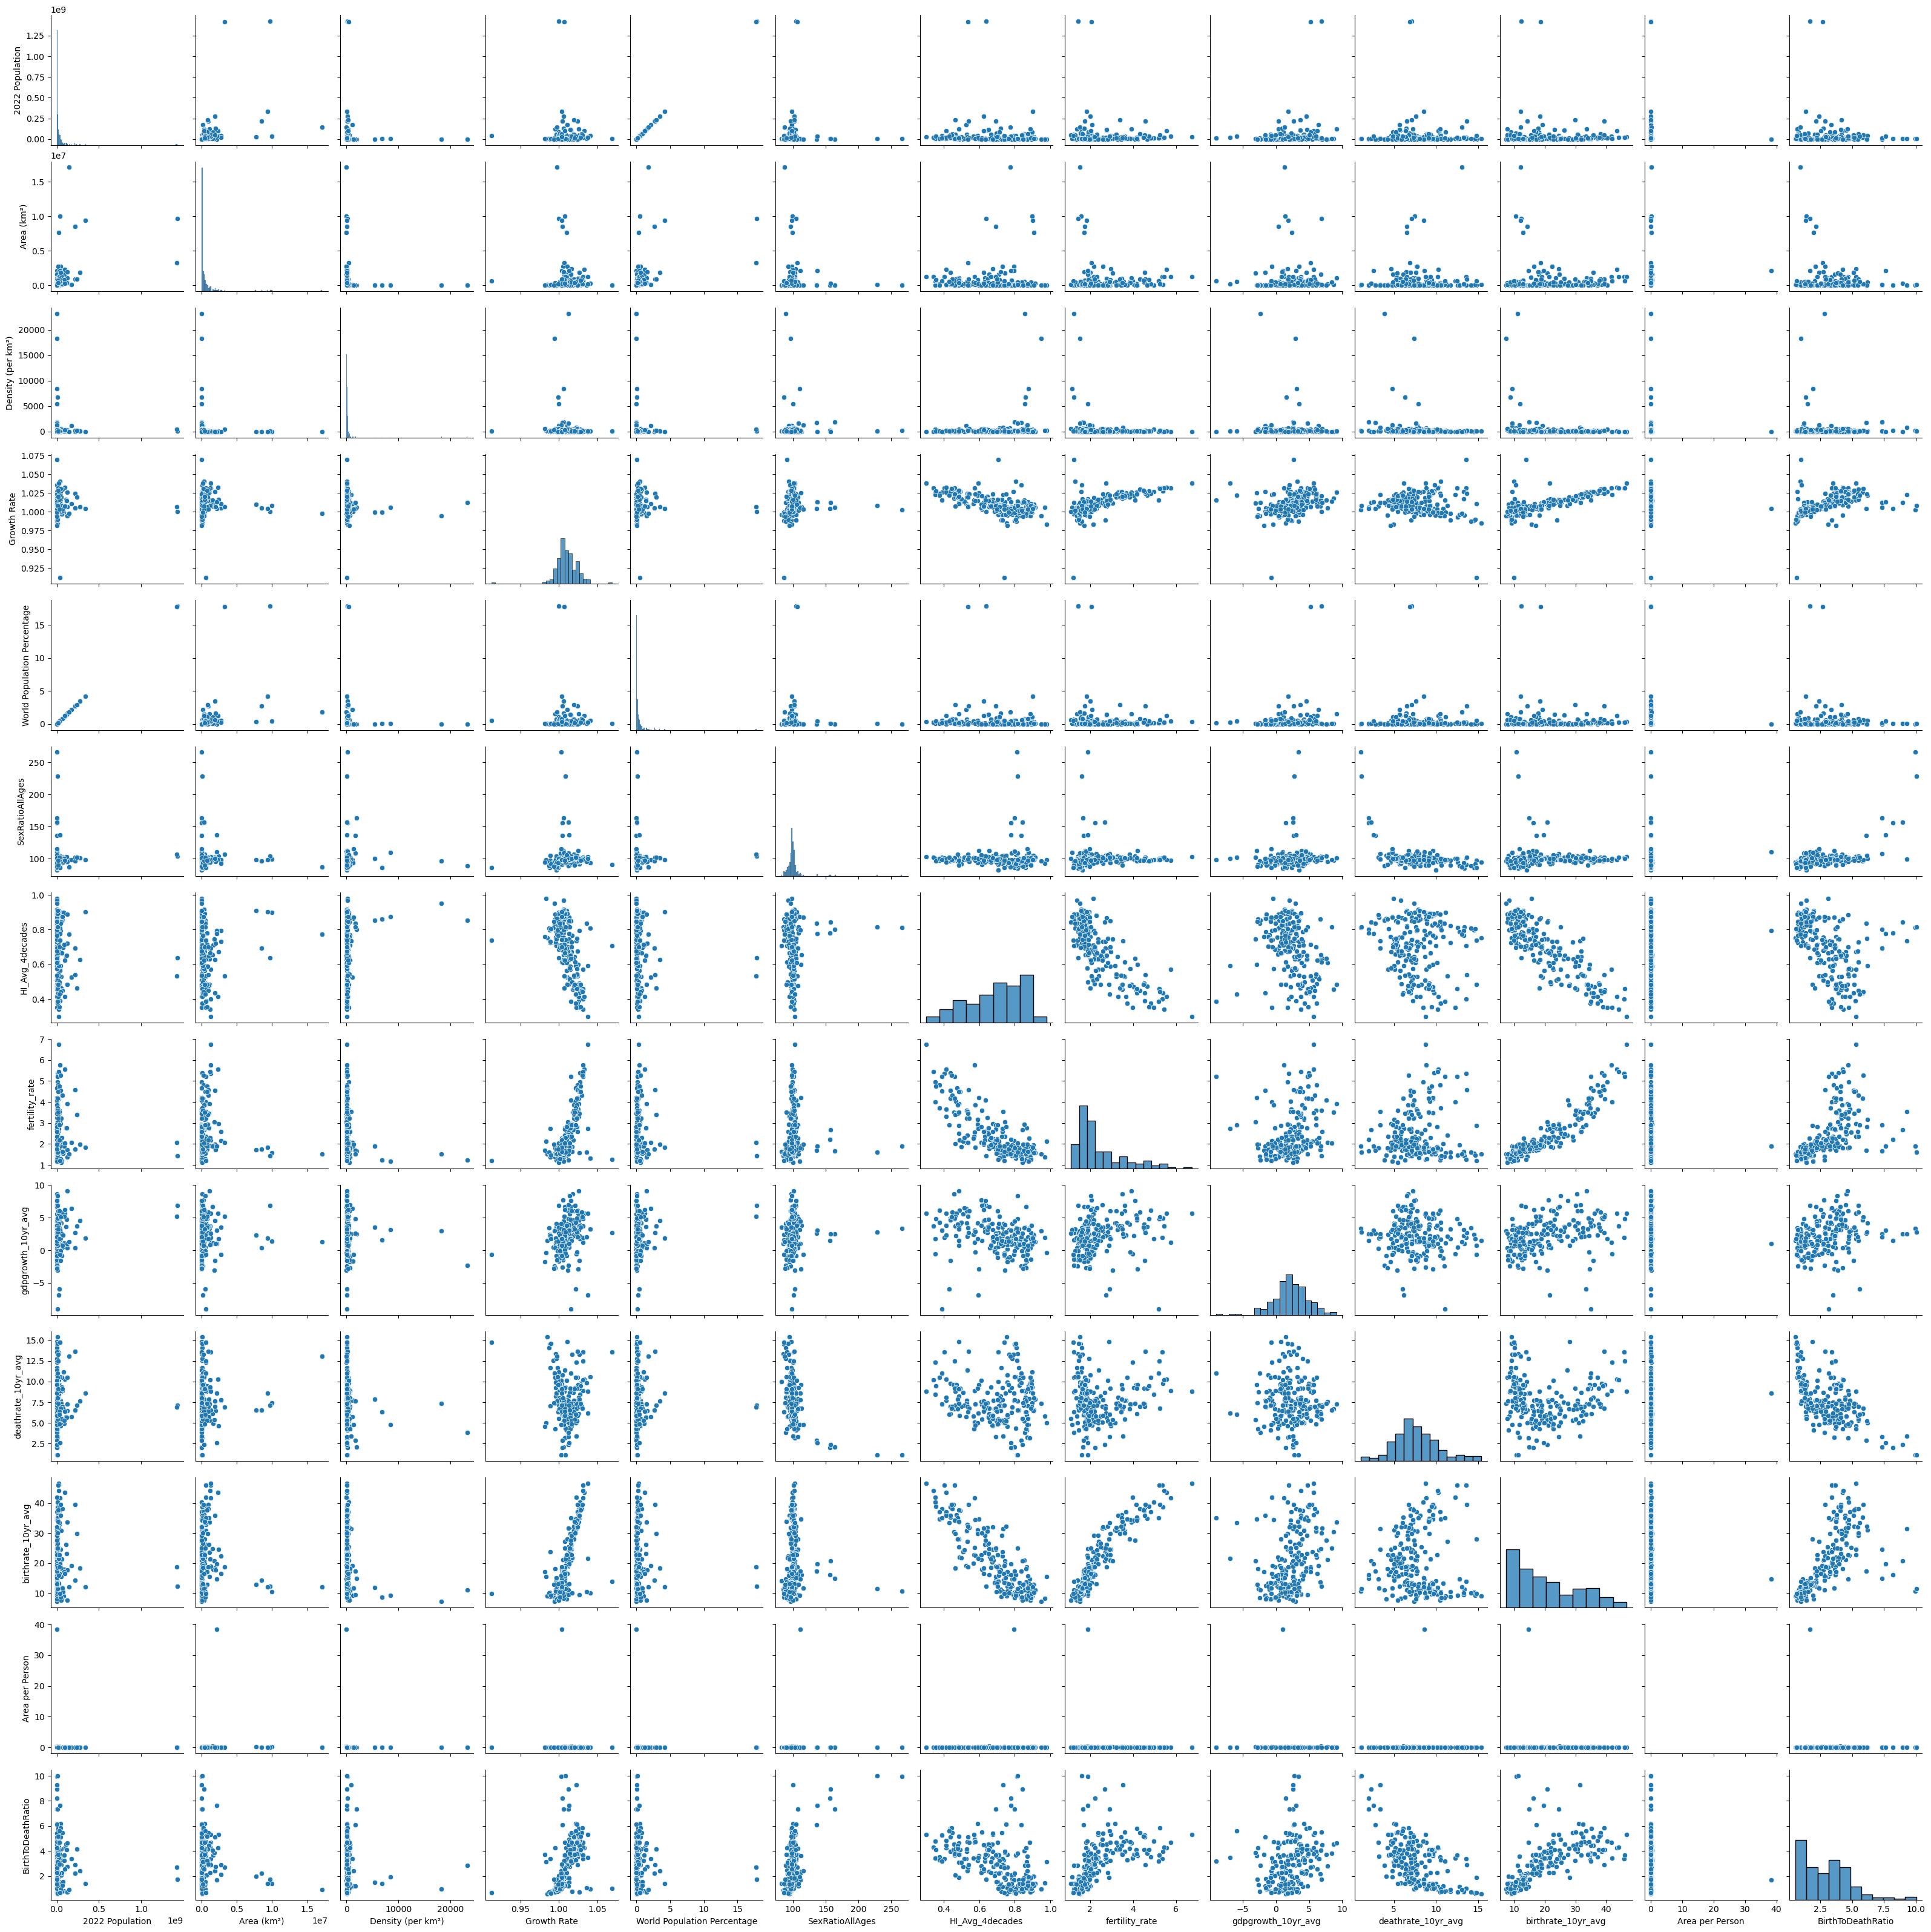

In [61]:
# Creating pairplot to check linearity between the dependent and independent variables
sns.pairplot(data=pop)

# Train test split 

In [62]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [63]:
dummy = pd.get_dummies(pop['HdiTier'],drop_first=True)
pop_2 = pd.concat([pop,dummy],axis = 1)

In [64]:
pop_2.drop('HdiTier',axis = 1,inplace = True)

In [65]:
pop_2.head()

2022 Population  Area (km²)  Density (per km²)  Growth Rate  \
0         41128771      652230            63.0587       1.0257   
1          2842321       28748            98.8702       0.9957   
2         44903225     2381741            18.8531       1.0164   
3            44273         199           222.4774       0.9831   
4            79824         468           170.5641       1.0100   

   World Population Percentage  SexRatioAllAges  HI_Avg_4decades  \
0                         0.52            102.1            0.390   
1                         0.04             99.8            0.719   
2                         0.56            103.8            0.674   
3                         0.00             98.0            0.980   
4                         0.00            104.4            0.866   

   fertility_rate  gdpgrowth_10yr_avg  deathrate_10yr_avg  birthrate_10yr_avg  \
0            4.53                3.06                7.28               38.21   
1            1.55                1.89                8.22               11.37   
2            2.97                1.80                4.64               24.60   
3            2.13               -0.40                4.97               15.60   
4            1.46               -0.81                4.12                8.12   

   Area per Person  BirthToDeathRatio  Low  Medium  Very High  
0         0.015858               5.25    1       0          0  
1         0.010114               1.38    0       0          0  
2         0.053042               5.30    0       0          0  
3         0.004495               3.14    0       0          1  
4         0.005863               1.97    0       0          1

In [66]:
# Separating the dependent and independent variables
X = pop_2.iloc[:,1:]
y = pop_2['2022 Population']

In [67]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [68]:
def vif(data):
    vif = pd.DataFrame()
    vif['features'] = data.columns
    vif['score'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    vif = vif.sort_values(by = 'score',ascending=False).round(2)
    return vif

In [69]:
#Checking Vif Score
vif(X_train)

features   score
2                   Growth Rate  326.44
5               HI_Avg_4decades  181.01
9            birthrate_10yr_avg  122.35
4               SexRatioAllAges   99.17
6                fertility_rate   61.89
11            BirthToDeathRatio   39.74
8            deathrate_10yr_avg   29.83
12                          Low    7.03
14                    Very High    5.99
13                       Medium    3.47
7            gdpgrowth_10yr_avg    2.18
0                    Area (km²)    1.93
3   World Population Percentage    1.90
1             Density (per km²)    1.17
10              Area per Person    1.06

In [70]:
# Standardizing the value in the same scale 
scaler = StandardScaler()

X_train[X_train.columns.tolist()] = scaler.fit_transform(X_train)

X_test[X_test.columns.tolist()] = scaler.transform(X_test)

In [71]:
X_train.describe()

Area (km²)  Density (per km²)   Growth Rate  \
count  1.710000e+02       1.710000e+02  1.710000e+02   
mean  -6.492532e-18       2.077610e-17  4.996653e-15   
std    1.002937e+00       1.002937e+00  1.002937e+00   
min   -3.674896e-01      -2.251349e-01 -6.997173e+00   
25%   -3.626829e-01      -2.090158e-01 -4.573859e-01   
50%   -3.123054e-01      -1.863692e-01 -1.286097e-01   
75%   -8.555201e-02      -1.286484e-01  5.754001e-01   
max    5.995198e+00       9.427050e+00  4.231248e+00   

       World Population Percentage  SexRatioAllAges  HI_Avg_4decades  \
count                 1.710000e+02     1.710000e+02     1.710000e+02   
mean                 -4.155221e-17    -7.427457e-16    -1.662088e-16   
std                   1.002937e+00     1.002937e+00     1.002937e+00   
min                  -2.610000e-01    -1.054712e+00    -2.190549e+00   
25%                  -2.541495e-01    -2.523398e-01    -7.557975e-01   
50%                  -2.130465e-01    -1.400624e-01     1.037891e-01   
75%                  -8.631229e-02     2.338111e-03     8.748888e-01   
max                   1.198769e+01     9.028342e+00     1.791360e+00   

       fertility_rate  gdpgrowth_10yr_avg  deathrate_10yr_avg  \
count    1.710000e+02        1.710000e+02        1.710000e+02   
mean     9.868649e-17       -4.155221e-17       -1.038805e-16   
std      1.002937e+00        1.002937e+00        1.002937e+00   
min     -1.219027e+00       -4.310335e+00       -2.454008e+00   
25%     -6.740440e-01       -5.124090e-01       -6.756373e-01   
50%     -4.085396e-01        7.591077e-03       -1.254129e-01   
75%      4.485273e-01        5.507022e-01        5.844329e-01   
max      3.112887e+00        2.673073e+00        2.924295e+00   

       birthrate_10yr_avg  Area per Person  BirthToDeathRatio           Low  \
count        1.710000e+02     1.710000e+02       1.710000e+02  1.710000e+02   
mean         2.181491e-16    -5.194026e-18      -1.817909e-16  2.597013e-17   
std          1.002937e+00     1.002937e+00       1.002937e+00  1.002937e+00   
min         -1.279139e+00    -8.716834e-02      -1.358291e+00 -4.330127e-01   
25%         -8.530725e-01    -8.570645e-02      -9.012779e-01 -4.330127e-01   
50%         -2.986962e-01    -8.350845e-02      -7.865510e-02 -4.330127e-01   
75%          9.016362e-01    -7.834703e-02       5.833208e-01 -4.330127e-01   
max          2.516282e+00     1.303533e+01       3.859963e+00  2.309401e+00   

             Medium     Very High  
count  1.710000e+02  1.710000e+02  
mean   6.297756e-17  4.544773e-17  
std    1.002937e+00  1.002937e+00  
min   -4.981718e-01 -8.325078e-01  
25%   -4.981718e-01 -8.325078e-01  
50%   -4.981718e-01 -8.325078e-01  
75%   -4.981718e-01  1.201190e+00  
max    2.007339e+00  1.201190e+00

In [72]:
X_test.describe()

Area (km²)  Density (per km²)  Growth Rate  \
count   43.000000          43.000000    43.000000   
mean     0.181437          -0.153356     0.020320   
std      1.681431           0.090715     0.854279   
min     -0.367376          -0.223574    -1.593808   
25%     -0.349571          -0.208498    -0.557448   
50%     -0.263231          -0.182643    -0.142904   
75%     -0.013830          -0.125891     0.436028   
max     10.528292           0.258056     2.179971   

       World Population Percentage  SexRatioAllAges  HI_Avg_4decades  \
count                    43.000000        43.000000        43.000000   
mean                      0.287996        -0.039567        -0.074508   
std                       1.864306         0.646186         1.027733   
min                      -0.261000        -0.813727        -2.506573   
25%                      -0.240449        -0.342709        -0.724195   
50%                      -0.165093        -0.140062         0.204917   
75%                       0.067824         0.051631         0.637870   
max                      11.912338         3.009180         1.241477   

       fertility_rate  gdpgrowth_10yr_avg  deathrate_10yr_avg  \
count       43.000000           43.000000           43.000000   
mean         0.008511            0.084449            0.207456   
std          1.119328            1.017318            1.044828   
min         -1.097919           -3.123965           -2.115986   
25%         -0.701992           -0.523965           -0.347005   
50%         -0.427171            0.026850            0.058621   
75%          0.238919            0.708628            0.836071   
max          4.016534            2.388036            2.597541   

       birthrate_10yr_avg  Area per Person  BirthToDeathRatio        Low  \
count           43.000000        43.000000          43.000000  43.000000   
mean            -0.027590        -0.076413          -0.051473  -0.050350   
std              0.998803         0.019189           1.090744   0.961503   
min             -1.212536        -0.086888          -1.297356  -0.433013   
25%             -0.913310        -0.085747          -1.017608  -0.433013   
50%             -0.183120        -0.083831          -0.206065  -0.433013   
75%              0.575475        -0.078158           0.611019  -0.433013   
max              2.576029         0.003490           2.851766   2.309401   

          Medium  Very High  
count  43.000000  43.000000  
mean   -0.032030   0.066103  
std     0.986544   1.021904  
min    -0.498172  -0.832508  
25%    -0.498172  -0.832508  
50%    -0.498172  -0.832508  
75%    -0.498172   1.201190  
max     2.007339   1.201190

In [73]:
#Using linear regression 

lin_m1 = LinearRegression()

lin_m1.fit(X_train,y_train)

LinearRegression()

In [74]:
y_test_pred = lin_m1.predict(X_test)

print(f'The r2_score for the Regression model is:{r2_score(y_test,y_test_pred)}')

The r2_score for the Regression model is:0.9999984952288286


C:\Users\surya\AppData\Local\Temp\ipykernel_14532\4023965816.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




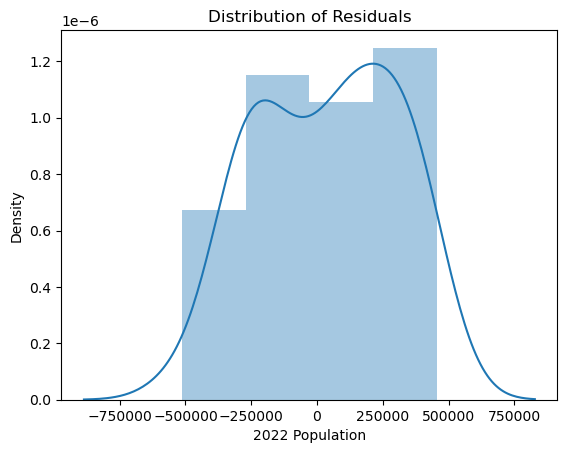

In [75]:
# Checking if the residuals are normally distributed
res = y_test-y_test_pred

#Plotting the residuals 
sns.distplot(res,kde=True)

plt.title('Distribution of Residuals')

plt.show()

- The error terms are not normally distributed which does not fall true to the assumption of linear regression model

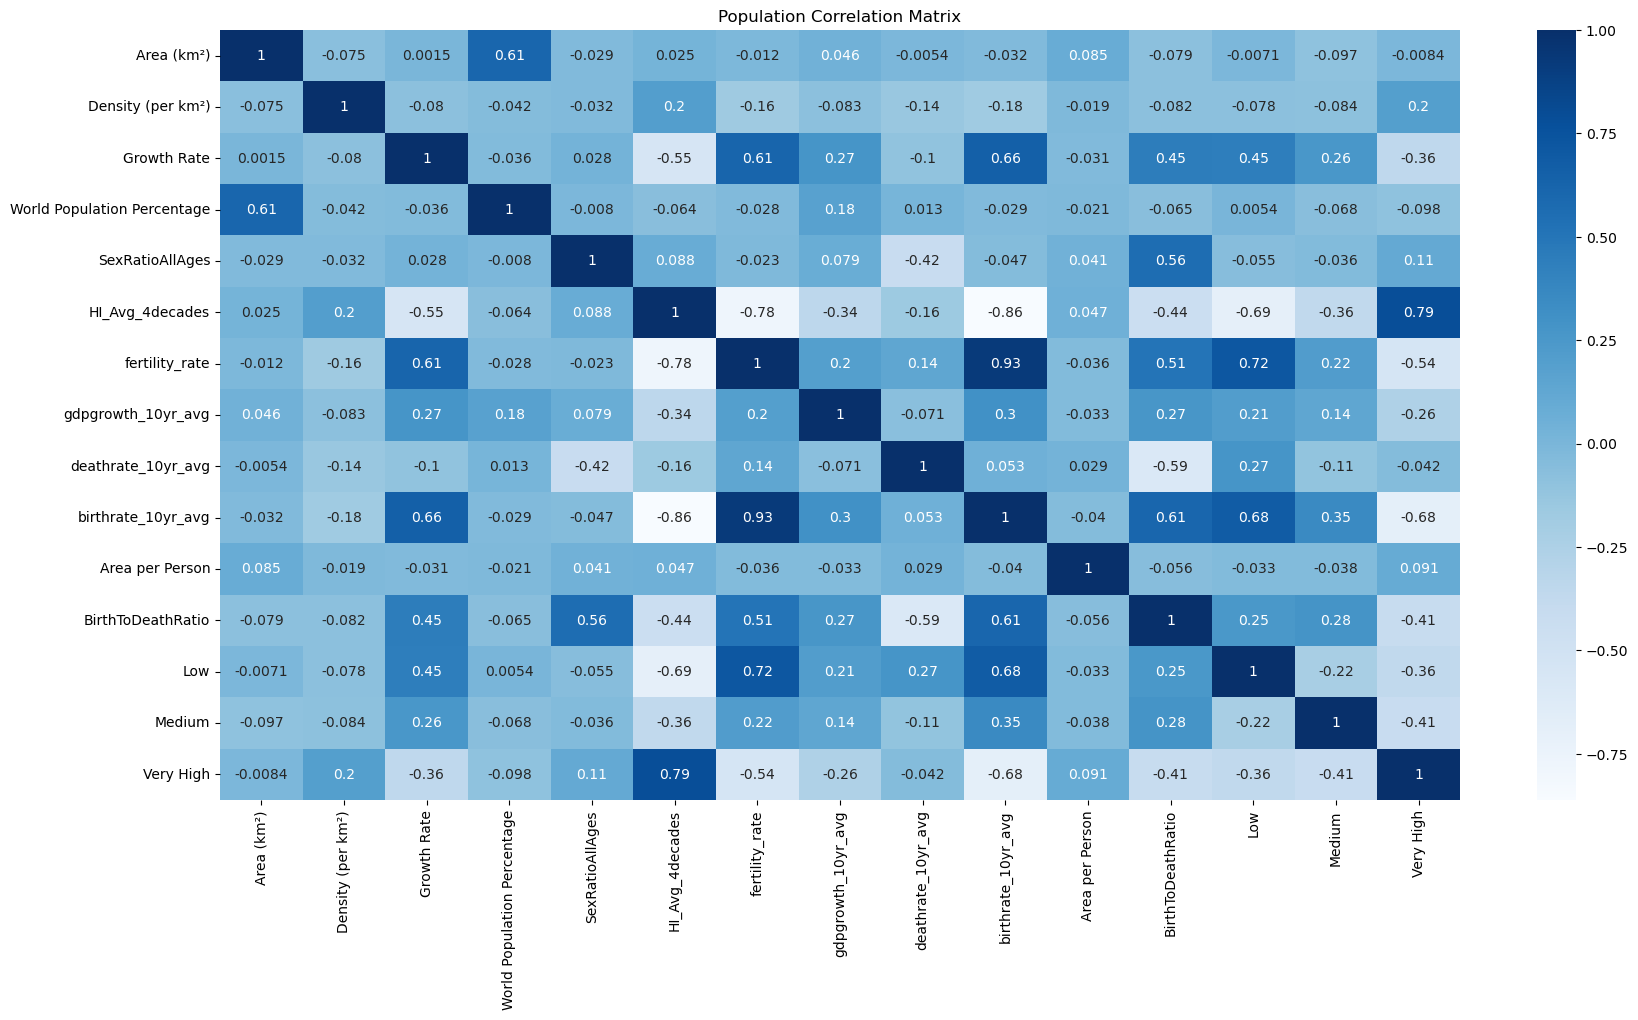

In [76]:
# Plotting the heatmap
plt.figure(figsize =(20,10))

sns.heatmap(X_train.corr(),annot=True,cmap = 'Blues')

plt.title('Population Correlation Matrix')

plt.show()

In [77]:
# Using rfe to remove the recursive feature that are leading to overfitting 
rfe = RFE(estimator=lin_m1,n_features_to_select=7)

rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=7)

In [78]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Area (km²)', False, 8),
 ('Density (per km²)', False, 6),
 ('Growth Rate', False, 7),
 ('World Population Percentage', True, 1),
 ('SexRatioAllAges', True, 1),
 ('HI_Avg_4decades', True, 1),
 ('fertility_rate', True, 1),
 ('gdpgrowth_10yr_avg', True, 1),
 ('deathrate_10yr_avg', False, 4),
 ('birthrate_10yr_avg', True, 1),
 ('Area per Person', False, 9),
 ('BirthToDeathRatio', True, 1),
 ('Low', False, 5),
 ('Medium', False, 2),
 ('Very High', False, 3)]

In [79]:
# Columns to select after rfe 
cols_rf = X_train.columns[rfe.support_]

In [80]:
cols_rf

Index(['World Population Percentage', 'SexRatioAllAges', 'HI_Avg_4decades',
       'fertility_rate', 'gdpgrowth_10yr_avg', 'birthrate_10yr_avg',
       'BirthToDeathRatio'],
      dtype='object')

In [81]:
cols_drop = X_train.columns[~rfe.support_]

X_train.drop(columns=cols_drop,inplace = True)

In [82]:
# Checking VIf after elimination
vif(X_train)

features  score
5           birthrate_10yr_avg  19.39
3               fertility_rate   8.80
2              HI_Avg_4decades   4.44
6            BirthToDeathRatio   4.33
1              SexRatioAllAges   2.53
4           gdpgrowth_10yr_avg   1.25
0  World Population Percentage   1.07

In [83]:
X_train.drop(columns='birthrate_10yr_avg',inplace = True)

In [84]:
lin_m2 = LinearRegression()

lin_m2.fit(X_train,y_train)

LinearRegression()

In [85]:
cols_drop = cols_drop.tolist()
cols_drop.append('birthrate_10yr_avg')
X_test.drop(columns=cols_drop,inplace=True)

In [86]:
y_test_pred2 = lin_m2.predict(X_test)
y_train_pred = lin_m2.predict(X_train)
print(f'The r2_score for the Regression model is:{r2_score(y_test,y_test_pred2)}')

The r2_score for the Regression model is:0.9999986133843946


C:\Users\surya\AppData\Local\Temp\ipykernel_14532\1655374964.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




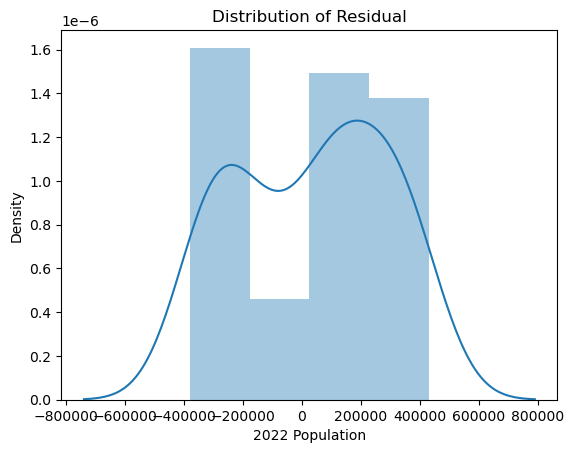

In [87]:
res_2 = y_test-y_test_pred2

sns.distplot(res_2,kde = True)

plt.title('Distribution of Residual')

plt.show()

In [88]:
vif(X_train)

features  score
2              HI_Avg_4decades   2.97
3               fertility_rate   2.95
5            BirthToDeathRatio   2.62
1              SexRatioAllAges   1.90
4           gdpgrowth_10yr_avg   1.22
0  World Population Percentage   1.06